<a href="https://colab.research.google.com/github/won195/TIL/blob/master/KOSIS_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 한국공항공사, 인천국제공항공사,「항공통계」, 2023.09, 2023.11.14, 항공사별 통계

* https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import koreanize_matplotlib

In [19]:
df_comp = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/kosis-airline-company.csv", encoding='cp949', dtype={"시점": "object"})
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [20]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3720 non-null   object
 1   항공사별(1)   3720 non-null   object
 2   도착출발별(1)  3720 non-null   object
 3   운항 (편)    3720 non-null   int64 
 4   여객 (명)    3720 non-null   int64 
 5   화물 (톤)    3720 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 174.5+ KB


In [15]:
df_comp.groupby('항공사별(1)').sum()

<ipython-input-15-07be65e8dbc2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comp.groupby('항공사별(1)').sum()


,시점,운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (편)_증가율
항공사별(1),,,,,,
대한항공,906274.98,3653234,558999512,33468741,52.628024,201.925217
아시아나항공,906274.98,2508761,374489490,16195331,26.671947,165.194104
에어로케이항공,129408.00,11094,1665778,9746,1900.897050,1818.436858
에어부산,725693.40,801352,119221666,830405,813.689879,1114.347552
에어서울,351425.40,88989,16120677,91451,1384.351843,1399.274103
에어인천,512578.44,17513,0,175465,1438.150415,0.000000
에어프레미아,101113.24,3073,744170,30656,679.133882,NaN
외항사,906274.98,2215319,307123817,19355037,176.112090,608.229248
이스타항공,576196.22,431975,65786073,388564,NaN,NaN


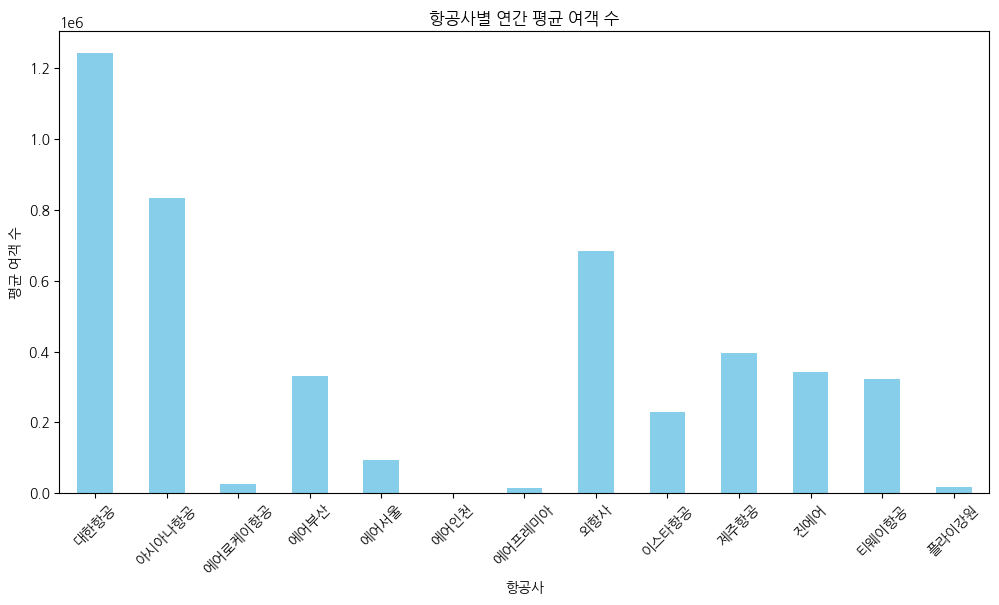

In [7]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_comp.groupby("항공사별(1)")["여객 (명)"].mean()

plt.figure(figsize=(12, 6))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()


# 연간 운항 및 여객 증가율 계산

 * 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교합니다

In [8]:
df_comp["운항 (편)_증가율"] = df_comp.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

df_comp["여객 (편)_증가율"] = df_comp.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (편)_증가율
0,2005.01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005.01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005.01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005.01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005.01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,0.000000,3.891187
3716,2023.09,에어프레미아,도착,111,29206,1367,-11.200000,-18.500949
3717,2023.09,에어프레미아,출발,111,32302,1453,0.000000,10.600562
3718,2023.09,외항사,도착,6585,925104,50054,-1.994344,-12.460363


# 도착/출발별로 연간 운항 및 여객 분석:
  * 도착과 출발별로 연간 운항 편수 및 여객 수를 분석합니다

In [9]:
arrival_stats = df_comp[df_comp["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

departure_stats = df_comp[df_comp["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

In [13]:
arrival_stats

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.05,33421,5529102
2023.06,33028,5618913
2023.07,34656,5743000


<Axes: xlabel='시점'>

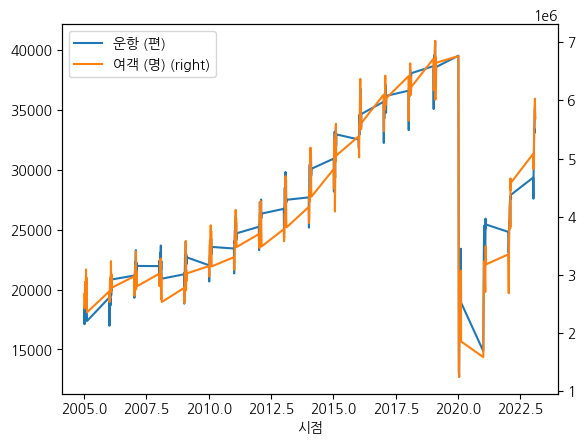

In [14]:
departure_stats.plot(secondary_y="여객 (명)")

# 시간에 따른 화물 운송량 시각화:
  * 시간에 따른 화물 운송량의 추이를 시각화합니다.

In [21]:
# 시간에 따른 화물 운송량 시각화
df_comp["시점"] = pd.to_datetime(df_comp["시점"])

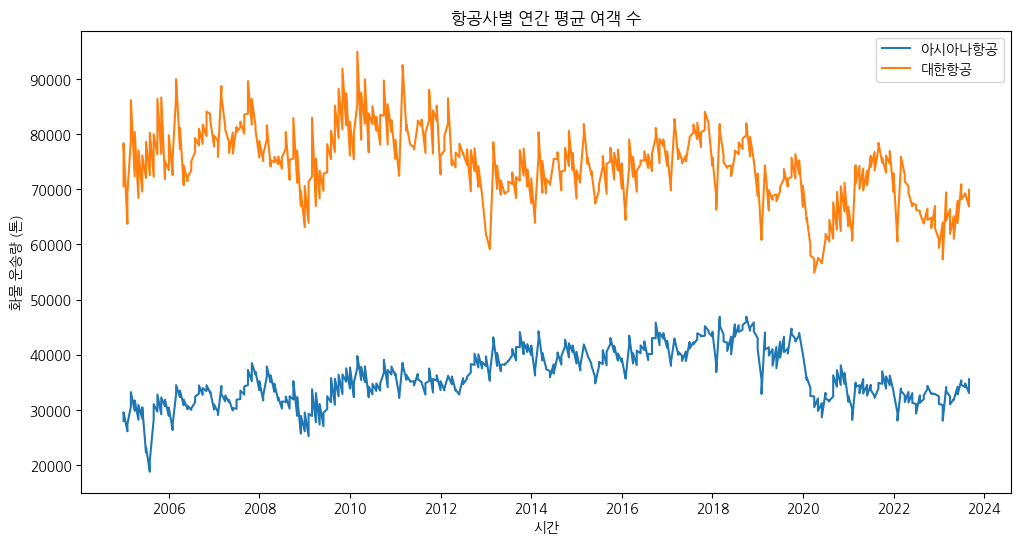

In [22]:

plt.figure(figsize=(12, 6))
plt.plot(df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_comp[df_comp["항공사별(1)"] == "대한항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("항공사별 연간 평균 여객 수")
plt.show()

* 데이터를 다시 로드하여 df_comp 초기화

In [42]:
df_comp = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/kosis-airline-company.csv", encoding='cp949', dtype={"시점": "object"})
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [43]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [44]:
reduce_mem_usage(df_comp)
df_comp.info()

Memory usage of dataframe is 0.17 MB
Memory usage after optimization is: 0.12 MB
Decreased by 29.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3720 non-null   object
 1   항공사별(1)   3720 non-null   object
 2   도착출발별(1)  3720 non-null   object
 3   운항 (편)    3720 non-null   int16 
 4   여객 (명)    3720 non-null   int32 
 5   화물 (톤)    3720 non-null   int32 
dtypes: int16(1), int32(2), object(3)
memory usage: 123.6+ KB


In [45]:
df_comp.columns = ['시점', '항공사', '도착출발', '운항_편', '여객_명', '화물_톤']
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245
3716,2023.09,에어프레미아,도착,111,29206,1367
3717,2023.09,에어프레미아,출발,111,32302,1453
3718,2023.09,외항사,도착,6585,925104,50054


In [46]:
df_comp["연도"] = df_comp["시점"].astype(str).str[:4].astype(int)
df_comp["월"] = df_comp["시점"].map(lambda x: int(x.split(".")[1][:2]))
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
0,2005.01,아시아나항공,도착,6613,791439,28012,2005,1
1,2005.01,아시아나항공,출발,6610,799835,29576,2005,1
2,2005.01,대한항공,도착,8869,1372897,70544,2005,1
3,2005.01,대한항공,출발,8870,1405847,78329,2005,1
4,2005.01,외항사,도착,3145,443386,28311,2005,1
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,2023,9
3716,2023.09,에어프레미아,도착,111,29206,1367,2023,9
3717,2023.09,에어프레미아,출발,111,32302,1453,2023,9
3718,2023.09,외항사,도착,6585,925104,50054,2023,9


In [47]:
# 데이터의 개수 => 통계치가 아님에 주의
# 데이터 전처리가 잘 되었는지 확인하는 용

pd.crosstab(df_comp["연도"], df_comp["월"])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2005,6,6,6,6,6,6,6,6,6,6,6,6
2006,6,6,6,6,6,8,8,8,8,8,8,8
2007,8,8,8,8,8,8,8,8,8,8,8,8
2008,8,8,8,8,8,8,10,10,10,12,12,12
2009,14,14,14,14,14,14,14,14,14,14,14,14
2010,14,14,14,14,14,14,14,14,16,16,16,16
2011,16,16,16,16,16,16,16,16,16,16,16,16
2012,16,16,16,16,16,16,16,16,16,16,16,16
2013,16,16,18,18,18,18,18,18,18,18,18,18


In [48]:
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
0,2005.01,아시아나항공,도착,6613,791439,28012,2005,1
1,2005.01,아시아나항공,출발,6610,799835,29576,2005,1
2,2005.01,대한항공,도착,8869,1372897,70544,2005,1
3,2005.01,대한항공,출발,8870,1405847,78329,2005,1
4,2005.01,외항사,도착,3145,443386,28311,2005,1
...,...,...,...,...,...,...,...,...
3715,2023.09,에어로케이항공,출발,314,44454,245,2023,9
3716,2023.09,에어프레미아,도착,111,29206,1367,2023,9
3717,2023.09,에어프레미아,출발,111,32302,1453,2023,9
3718,2023.09,외항사,도착,6585,925104,50054,2023,9


In [60]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["여객_명"],
            aggfunc="sum").fillna(0).astype(int)

In [61]:
year_comp.style.background_gradient(axis=None).format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"211,868","149,283",0,0,0,0,0,"80,798",0,0,0,0,0
2006,"212,738","146,808",0,0,0,0,0,"98,587",0,"9,568",0,0,0
2007,"220,360","145,843",0,0,0,0,0,"126,258",0,"27,152",0,0,0
2008,"217,270","156,893",0,"2,988",0,0,0,"122,093",0,"25,850","4,176",0,0
2009,"205,682","138,039",0,"29,782",0,0,0,"87,488","16,339","29,684","20,238",0,0
2010,"205,596","134,779",0,"37,230",0,0,0,"95,422","28,387","26,449","18,761","3,286",0
2011,"204,322","138,614",0,"38,162",0,0,0,"103,867","26,739","32,030","20,072","19,789",0
2012,"214,577","141,423",0,"39,710",0,0,0,"113,579","30,227","39,696","24,249","21,502",0
2013,"210,492","147,175",0,"46,911",0,416,0,"125,595","33,275","45,558","29,018","24,049",0


In [68]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [66]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["운항_편"],
            aggfunc="sum").fillna(0).astype(int)
year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"211,868","149,283",0,0,0,0,0,"80,798",0,0,0,0,0
2006,"212,738","146,808",0,0,0,0,0,"98,587",0,"9,568",0,0,0
2007,"220,360","145,843",0,0,0,0,0,"126,258",0,"27,152",0,0,0
2008,"217,270","156,893",0,"2,988",0,0,0,"122,093",0,"25,850","4,176",0,0
2009,"205,682","138,039",0,"29,782",0,0,0,"87,488","16,339","29,684","20,238",0,0
2010,"205,596","134,779",0,"37,230",0,0,0,"95,422","28,387","26,449","18,761","3,286",0
2011,"204,322","138,614",0,"38,162",0,0,0,"103,867","26,739","32,030","20,072","19,789",0
2012,"214,577","141,423",0,"39,710",0,0,0,"113,579","30,227","39,696","24,249","21,502",0
2013,"210,492","147,175",0,"46,911",0,416,0,"125,595","33,275","45,558","29,018","24,049",0


In [65]:
year_comp = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp["화물_톤"],
            aggfunc="sum").fillna(0).astype(int)
year_comp.style.background_gradient(axis=None, cmap="Oranges").format("{:,.0f}")

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"1,819,380","685,632",0,0,0,0,0,"856,586",0,0,0,0,0
2006,"1,879,078","762,478",0,0,0,0,0,"919,935",0,"2,554",0,0,0
2007,"1,954,382","788,058",0,0,0,0,0,"1,020,715",0,"7,968",0,0,0
2008,"1,814,978","781,787",0,"2,688",0,0,0,"894,448",0,"10,437","1,548",0,0
2009,"1,829,704","755,899",0,"22,502",0,0,0,"763,007","10,088","17,570","11,060",0,0
2010,"1,984,831","854,546",0,"29,819",0,0,0,"922,326","18,540","24,025","15,141","1,418",0
2011,"1,940,378","849,214",0,"35,402",0,0,0,"895,267","17,466","31,583","17,754","13,305",0
2012,"1,813,203","861,968",0,"37,500",0,0,0,"917,498","22,318","43,824","24,860","18,162",0
2013,"1,687,503","953,876",0,"43,707",0,"2,909",0,"929,790","27,465","53,750","31,009","21,623",0


In [69]:
df_comp["항공사"].unique()

array(['아시아나항공', '대한항공', '외항사', '제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

<Axes: title={'center': '저가항공 연도별 여객 수'}, xlabel='연도'>

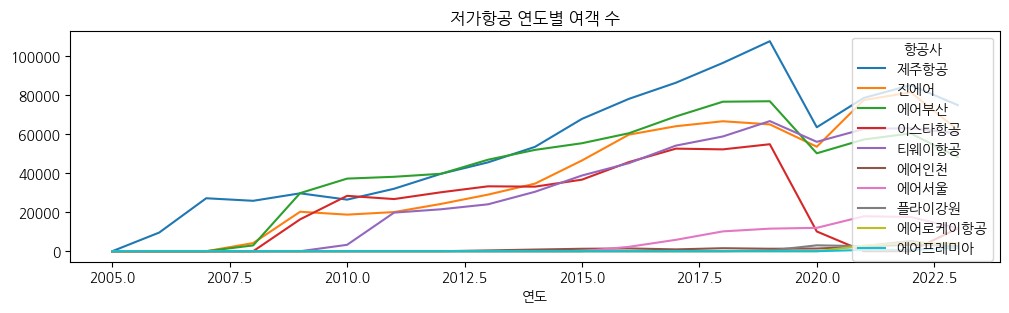

In [71]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아']].plot(figsize=(12, 3), title="저가항공 연도별 여객 수")

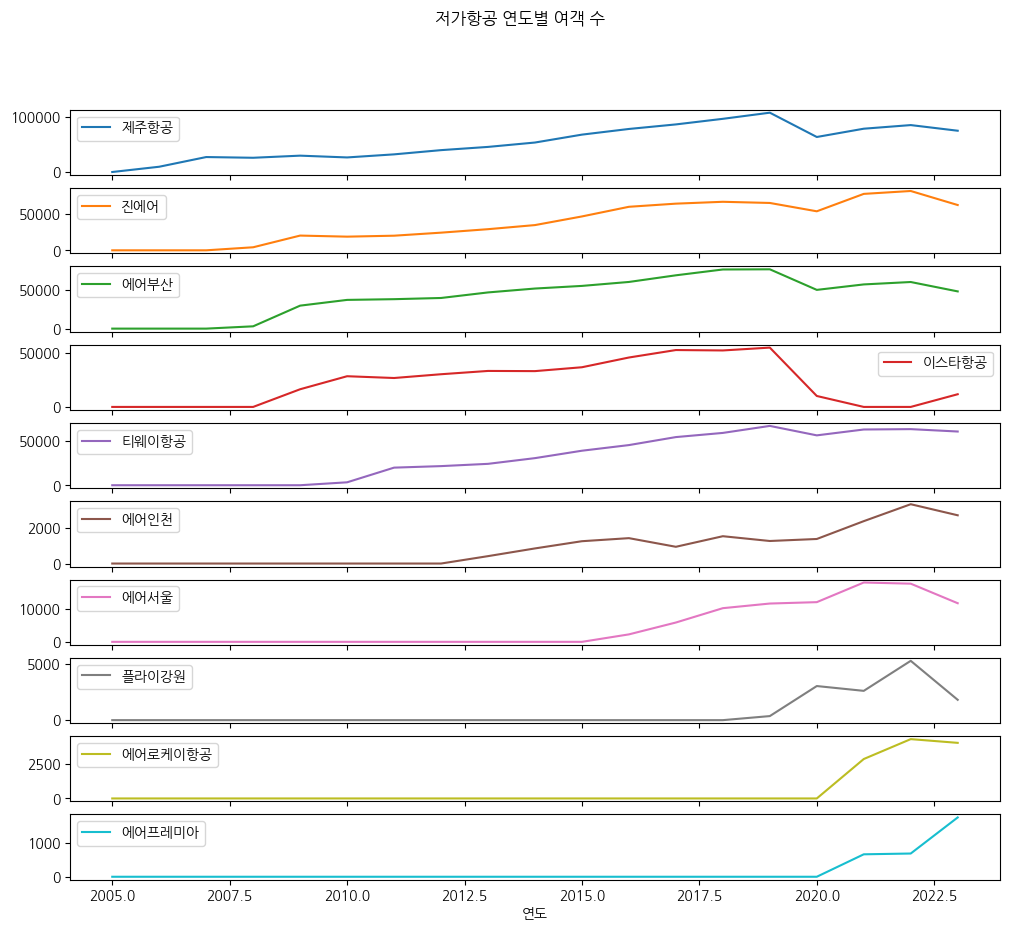

In [74]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아']].plot(figsize=(12, 10), title="저가항공 연도별 여객 수", subplots=True);